# Batch vs Stochastic Gradient Descent 

- Batch : More suitable for small training set. Main Components : 1) We go through all training samples and calculate cumulative error. 2) Then we back propagate and adjust weights 

- Stochastic Gradient Descent (SGD) : Best suitable for very large dataset (for example : 10 million samples). Main components 1) Use one(randomly picked) sample for a forward pass and then adjust weights.

The convergence of the Batch GD graph is smooth in comparison with stochastic which looks like having noise. 

- Mini Batch Gradient Descent : When instead of choosing **one** randomly picked training sample, you will use a **batch** of randomly picked training samples. 


In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing

In [39]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()


,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [8]:
#scale the data. sx = bedrooms , sy = area
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()


scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

# **Analytical implementation of Batch Gradient Descent**

In [20]:
# Analytical implementation of batch GD

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    
    #Parameter initilization
    w = np.ones(shape = (number_of_features))
    b = 0
    
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        
        y_predicted = np.dot(w,X.T) + b # w1 * area + w2 * bedrooms + bias 
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),5000)

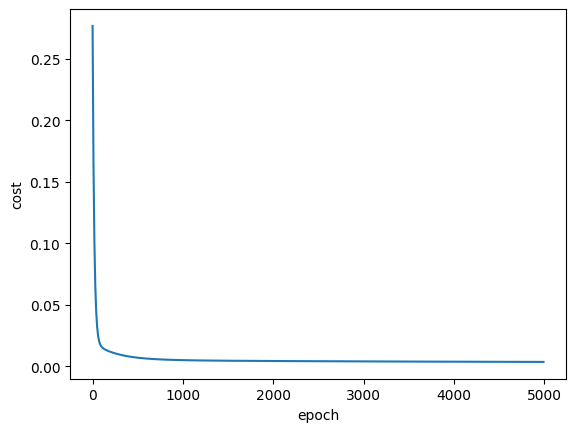

In [21]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [25]:
# Prediction function

def predict(area, bedrooms, w,b):
    
    # Scale with the same method as we did for the dataset beafore
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    # Reverse the scaling transformation 
    
    return sy.inverse_transform([[scaled_price]])[0][0]
    

predict(2600, 4, w, b) # Predict value based on the already calculated weights and bias 

C:\Users\Altair\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


121.62885338709971

# **Analytical Implementation of Stochastic Gradient Descent**

In [26]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

2

In [44]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b # Using the same weight and bias as before
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

# For SGD we use higher value for epochs
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),20000)
w_sgd, b_sgd, cost_sgd

(array([0.66249658, 0.60398464]), -0.1768730235240145, 0.005673136498131692)

In [45]:
# COmpare with batch GD
w_diff = np.abs(w - w_sgd)
b_diff = np.abs(b - b_sgd)
cost_diff = np.abs(cost - cost_sgd)

print(f' w : {w_diff}  , bias : {b_diff} , cost : {cost_diff}')

 w : [0.09293196 0.18814582]  , bias : 0.06002466337012374 , cost : 0.002247218793180775


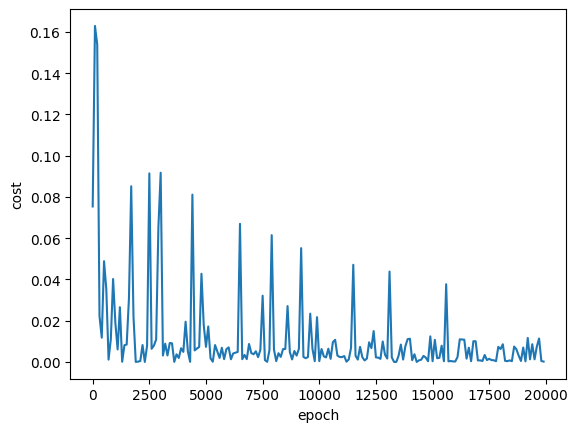

In [46]:
# The objective function value can be seen to be more noisy in comparison to the BGD method 
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [47]:
sgd_pred = predict(2600, 4, w_sgd, b_sgd)
bgd_pred = predict(2600, 4, w, b)

print(f' SGD prediction = {sgd_pred} , BGD prediction = {bgd_pred}, Real Value = { 120}')

 SGD prediction = 124.78823106631894 , BGD prediction = 121.62885338709971, Real Value = 120


C:\Users\Altair\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Altair\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
